Number of rows:  590
Number of features:  14
sample_id <class 'str'> sample_id
S1      1
S588    1
S302    1
S288    1
S497    1
       ..
S282    1
S321    1
S323    1
S363    1
S590    1
Name: count, Length: 590, dtype: int64
patient_cohort <class 'str'> patient_cohort
Cohort1    332
Cohort2    258
Name: count, dtype: int64
sample_origin <class 'str'> sample_origin
BPTB    409
LIV     132
ESP      29
UCL      20
Name: count, dtype: int64
age <class 'numpy.int64'> age
68    21
58    20
66    18
67    18
62    17
      ..
86     1
33     1
34     1
89     1
85     1
Name: count, Length: 63, dtype: int64
sex <class 'str'> sex
F    299
M    291
Name: count, dtype: int64
diagnosis <class 'numpy.int64'> diagnosis
2    208
3    199
1    183
Name: count, dtype: int64
stage <class 'float'> stage
III    76
IIB    68
IV     21
IB     12
IIA    11
II      7
IA      3
I       1
Name: count, dtype: int64
benign_sample_diagnosis <class 'float'> benign_sample_diagnosis
Pancreatitis                  

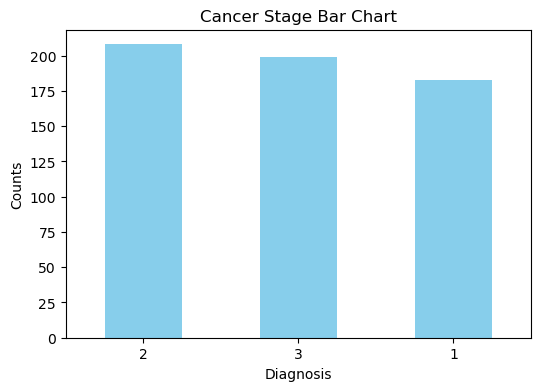

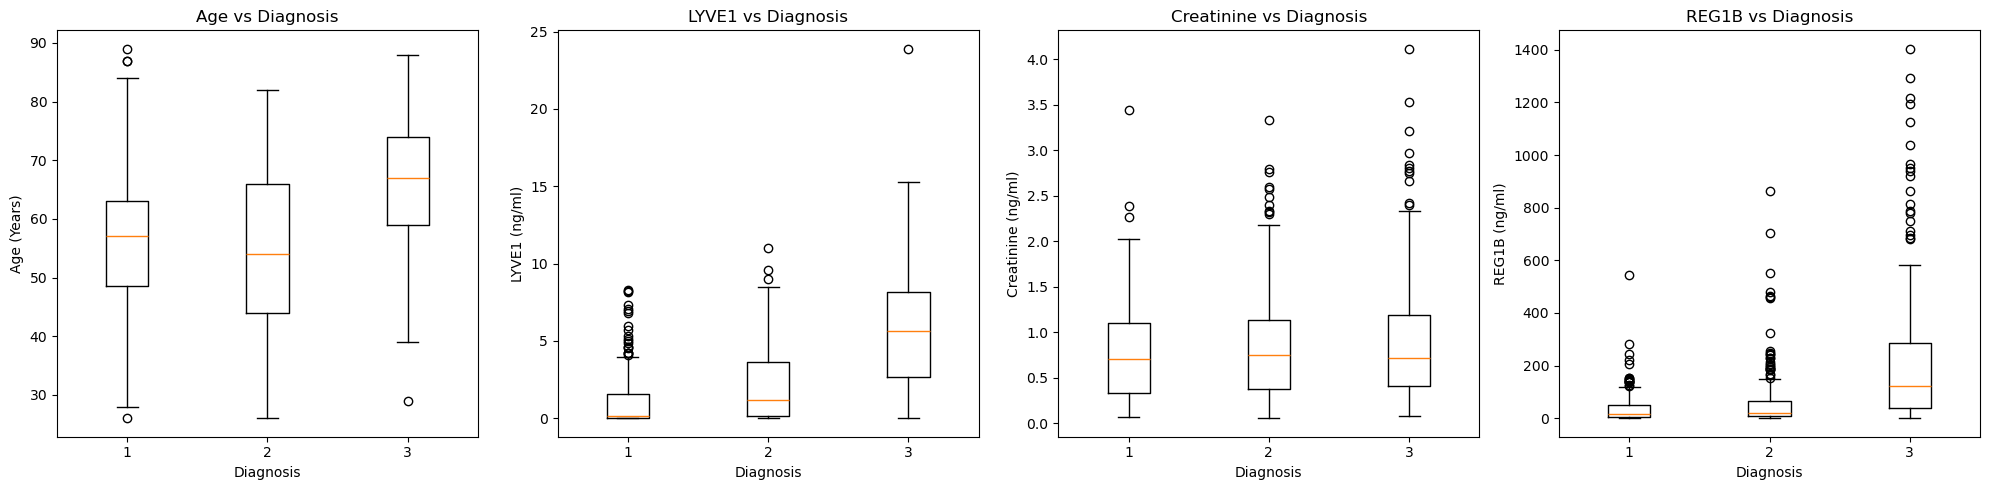

Training set class distribution: diagnosis
2    125
3    119
1    110
Name: count, dtype: int64
Validation set class distribution: diagnosis
2    41
3    40
1    37
Name: count, dtype: int64
Test set class distribution: diagnosis
2    42
3    40
1    36
Name: count, dtype: int64


In [43]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pylab as plt

df = pd.read_csv('/Users/matias/Documents/Brown University/Data Science 1030/DATA 1030 FinalProject/Debernardi et al 2020 data.csv')

# EDA

# How many rows and columns do we have in the dataframe?
rows, columns = df.shape
print("Number of rows: ", rows)
print("Number of features: ", columns)

# There are 590 rows, and 14 features

# What are the data types of the columns?
column_names = list(df)
for column in column_names:
    print(column,type(df[column][1]),df[column].value_counts()) 

# Data description based on csv Documentation:
    # Sample ID: unique string identifiying each subject
    # Patient Cohort: Cohort 1 previously used samples
    #                 Cohort 2 previously added samples
    # Sample_origin: BPTB Barts Pancreas Tissue Bank London,UK
    #                ESP: Spanish National Cancer Research Center
    #                LIV: Liverpool University, UK
    #                UCL: University College London, UK
    # Age: Age in years
    # Sex: "M" is Male, "F" is female
    # Diagnosis: (1 = Control, 2 = Benign, 3 = PDAC) [Pancreatic ductal adenocarcinoma]               
    # Stage: Pancratic Cancer: IA, IB, IIA, IIIUB, II, IV
    # Benign Samples Diagnosis: Different diagnoses that are not involved with Benign Samples (with multiple possibilities: eg: Pancreatitis)
    # Plasma CA19-9 U/ml: Blood plasma levels of CA 19-9 monoclonal antibody that is often elevated in patients with pancreatic cancer
    # Creatinine mg/ml: Urinary biomarkers of kidney function
    # LyVE1 ng/ml: Urinary levels of Lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
    # REG1B ng/ml: Urinary levels of a protein that may be associated with pancreas regeneration
    # TFF ng/ml: Urinary levels of Trefoil Factor 1, which may be related to regeneration and repair of the urinary tract
    # REG1A ng/ml: Urinary levels of a protein that may be associated with pancreas regeneration. Only assessed in 306 patients (one goal of the study was to assess REG1B vs REG1A)

# Is the target variable continuous or catergorical?
print(df['benign_sample_diagnosis'])

# Visualize the target variable

# Get counts of each category in the 'stage' column
stage_counts = df['diagnosis'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6,4))
stage_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Counts')
plt.title('Cancer Stage Bar Chart')
plt.xticks(rotation=0)

# Show the plot
plt.show()

# Develop some (3) figures that might correlate with the target variable

import matplotlib.pyplot as plt

# Set up the figure and subplots
plt.figure(figsize=(20,5))

# Boxplot for 'age'
plt.subplot(1, 4, 1)
plt.boxplot([df[df['diagnosis'] == stage]['age'] for stage in df['diagnosis'].unique()])
plt.title('Age vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age (Years)')
plt.xticks(ticks=range(1, len(df['diagnosis'].unique())+1), labels=df['diagnosis'].unique())

# Boxplot for 'LYVE1'
plt.subplot(1, 4, 2)
plt.boxplot([df[df['diagnosis'] == stage]['LYVE1'] for stage in df['diagnosis'].unique()])
plt.title('LYVE1 vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('LYVE1 (ng/ml)')
plt.xticks(ticks=range(1, len(df['diagnosis'].unique())+1), labels=df['diagnosis'].unique())

# Boxplot for 'creatinine'
plt.subplot(1, 4, 3)
plt.boxplot([df[df['diagnosis'] == stage]['creatinine'] for stage in df['diagnosis'].unique()])
plt.title('Creatinine vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Creatinine (ng/ml)')
plt.xticks(ticks=range(1, len(df['diagnosis'].unique())+1), labels=df['diagnosis'].unique())

# Boxplot for 'REG1B'
plt.subplot(1, 4, 4)
plt.boxplot([df[df['diagnosis'] == stage]['REG1B'] for stage in df['diagnosis'].unique()])
plt.title('REG1B vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('REG1B (ng/ml)')
plt.xticks(ticks=range(1, len(df['diagnosis'].unique())+1), labels=df['diagnosis'].unique())


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Drop the target variable and associated diagnosis-related matrix features
X = df.drop(columns=['diagnosis','stage','benign_sample_diagnosis'],axis=1)
# Isolate the Diagnosis Target Variable
y = df['diagnosis']
# print(df.head())

# Split into Test and Training
# Step 1: Split into 60% train and 40% validation/test
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=30
)

# Step 2: Split the validation/test set into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, stratify=y_val_test, random_state=30
)

# Verification of Training/Validation/Test Distributions
print("Training set class distribution:", y_train.value_counts())
print("Validation set class distribution:", y_val.value_counts())
print("Test set class distribution:", y_test.value_counts())


# Preprocess the data into 1s and 0s




